In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
dataset_path = "/kaggle/input"
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/sample_submission.csv
/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/train_dataset.csv
/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/test_dataset.csv
/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/val_dataset.csv


In [2]:
# Loading data (train, val, test)
train_df = pd.read_csv(f"{dirname}/train_dataset.csv")
val_df = pd.read_csv(f"{dirname}/val_dataset.csv")
test_df = pd.read_csv(f"{dirname}/test_dataset.csv")

import os
import re
import nltk
from nltk.corpus import stopwords
nltk.data.path.append("/usr/share/nltk_data")
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Init a preprocess function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text)
    #words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Προσθήκη των στηλών για το μήκος των κειμένων και τον αριθμό των λέξεων
train_df['text_length'] = train_df['Text'].apply(len)  # Μήκος Κειμένου
train_df['word_count'] = train_df['Text'].apply(lambda x: len(x.split()))  # Αριθμός Λέξεων
print("Done!")

Done!


In [3]:
# Saving data into an array and using preprocessing function
datasets = [train_df, val_df, test_df]
for df in datasets:
    df["clean_text"] = df["Text"].apply(preprocess_text)

print("Done!")

Done!


In [4]:
# Μετατροπή κειμένου σε TF-IDF χαρακτηριστικά
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df["clean_text"])
y_train = train_df["Label"]
X_val = vectorizer.transform(val_df["clean_text"])
y_val = val_df["Label"]
X_test = vectorizer.transform(test_df["clean_text"])


# Εκπαίδευση Logistic Regression μοντέλου
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)




# Πρόβλεψη στο validation set
y_val_pred = model.predict(X_val)

# Αξιολόγηση στο validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1-score: {f1:.4f}")

Validation Accuracy: 0.7863
Validation Precision: 0.7810
Validation Recall: 0.7957
Validation F1-score: 0.7883


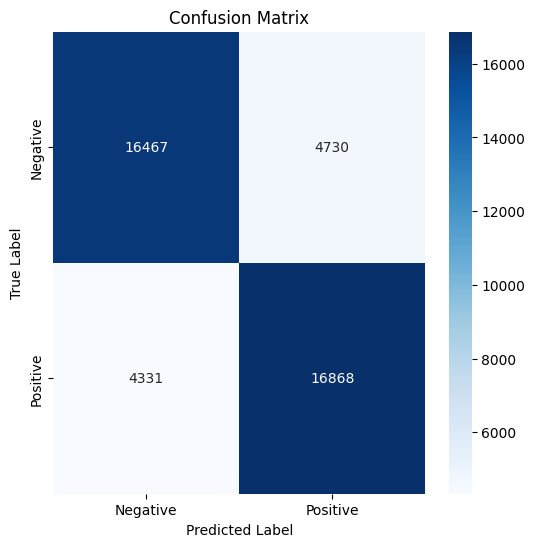

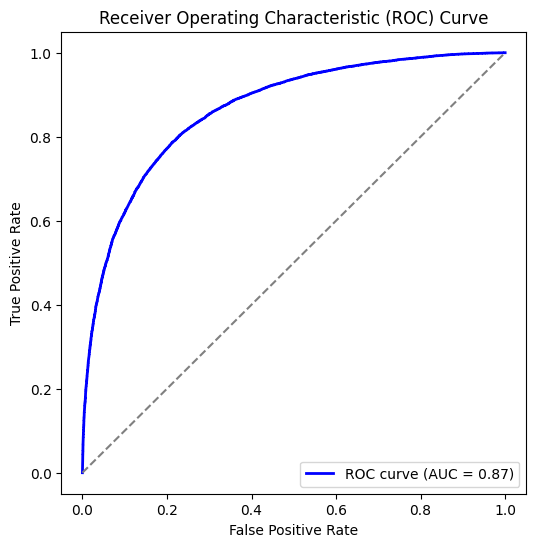

In [5]:
# Εισαγωγή των βιβλιοθηκών για τη δημιουργία γραφημάτων
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [6]:
y_submission = model.predict(X_test)
submission = pd.DataFrame({"ID": test_df["ID"], "Label": y_submission})
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("Submission file created at /kaggle/working/submission.csv")

Submission file created at /kaggle/working/submission.csv
